# Sales Analysis

In [1]:
import pandas as pd
import os

#### Merging 12 months data into one file

In [2]:
df = pd.read_csv('./Sales_Data/Sales_April_2019.csv')

files = [file for file in os.listdir('./Sales_Data')]

all_month_data = pd.DataFrame()

for file in files:
    df = pd.read_csv('./Sales_Data/' + file)
    all_month_data = pd.concat([all_month_data, df])

all_month_data.to_csv('Merged_Data.csv', index=False)

   #### Read the updated file

In [3]:
merged_data = pd.read_csv('Merged_Data.csv')
merged_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


### Cleaning up the data

#### 1. Dropping NaN Values

In [4]:
merged_data = merged_data.dropna(how='all')
merged_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


#### 2. Removing duplicated data 

In [5]:
merged_data = merged_data[merged_data['Order Date'].str[0:2] != 'Or']

#### 3. Converting columns to right dtype

In [6]:
merged_data['Quantity Ordered'] = pd.to_numeric(merged_data['Quantity Ordered'])
merged_data['Price Each'] = pd.to_numeric(merged_data['Price Each'])

### Adding New Columns For Easy Access

#### 1. Month (Also changing month type from str to int)

In [7]:
#Alternative method
# merged_data['Month'] = merged_data['Order Date'].str[0:2]
# merged_data['Month'] = merged_data['Month'].astype('int32')
# merged_data.head()

merged_data['Month'] = pd.to_datetime(merged_data['Order Date']).dt.month
merged_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


#### 2. Sales

In [8]:
merged_data['Sales'] = merged_data['Quantity Ordered'] * merged_data['Price Each']
merged_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


#### 3. City (state)

In [9]:
# def get_city(address):
#     return address.split(',')[1]

# def get_state(address):
#     return address.split(',')[2].split(' ')[1]

merged_data['City'] = merged_data['Purchase Address'].apply(lambda x: f"{x.split(',')[1]} ({x.split(',')[2].split(' ')[1]})")
merged_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA)
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)


### Answering questions

#### 1. What was the best month for sales and how much money was made in that month? 

In [10]:
total_sales = merged_data.groupby('Month')['Sales'].sum()
total_sales

Month
1     1822256.73
2     2202022.42
3     2807100.38
4     3390670.24
5     3152606.75
6     2577802.26
7     2647775.76
8     2244467.88
9     2097560.13
10    3736726.88
11    3199603.20
12    4613443.34
Name: Sales, dtype: float64

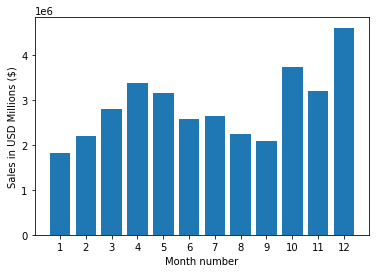

In [11]:
import matplotlib.pyplot as plt

months = range(1,13)

plt.bar(months,total_sales)
plt.xticks(months)
plt.ylabel('Sales in USD Millions ($)')
plt.xlabel('Month number')

plt.show()

#### 2. Which city had the highest number of sales?

In [12]:
most_sold_city = merged_data.groupby('City')[['Quantity Ordered', 'Sales']].sum()
most_sold_city

,Quantity Ordered,Sales
City,,
Atlanta (GA),16602,2795498.58
Austin (TX),11153,1819581.75
Boston (MA),22528,3661642.01
Dallas (TX),16730,2767975.40
Los Angeles (CA),33289,5452570.80
New York City (NY),27932,4664317.43
Portland (ME),2750,449758.27
Portland (OR),11303,1870732.34
San Francisco (CA),50239,8262203.91


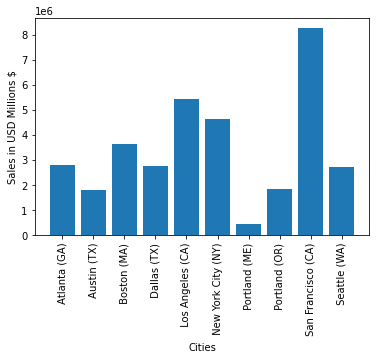

In [13]:
# need to fetch cities in the same order as the most_sold_city column
cities = [city for city, df in merged_data.groupby('City')]

plt.bar(cities, most_sold_city['Sales'])
plt.xticks(cities, rotation='vertical')
plt.xlabel('Cities')
plt.ylabel('Sales in USD Millions $')

plt.show()

#### 3. At what time should the advertisments be played to have the maximum effect?

In [14]:
merged_data['Order Date'] = pd.to_datetime(merged_data['Order Date'])

In [15]:
merged_data['Hours'] = merged_data['Order Date'].dt.hour
merged_data['Minutes'] = merged_data['Order Date'].dt.minute
merged_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hours,Minutes
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),9,27


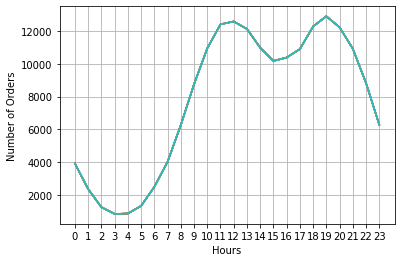

In [16]:
hours = [hour for hour, df in merged_data.groupby('Hours')]

plt.plot(hours, merged_data.groupby('Hours').count())
plt.xticks(hours)
plt.grid()
plt.xlabel('Hours')
plt.ylabel('Number of Orders')

plt.show()

#### 4. What products are sold together most often?

In [17]:
# Look at similar ORDER IDs, create a separate dataframe

df = merged_data[merged_data['Order ID'].duplicated(keep=False)]

# show the products in the same line

df['Grouped Products'] = df.groupby('Order ID')['Product'].transform(lambda x: ', '.join(x))
df.head(10)

# Drop the duplicates

df = df[['Order ID', 'Grouped Products']].drop_duplicates()
df.head(10)

C:\Users\uttam\AppData\Local\Temp\ipykernel_15680\2387407689.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Grouped Products'] = df.groupby('Order ID')['Product'].transform(lambda x: ', '.join(x))


,Order ID,Grouped Products
3,176560,"Google Phone, Wired Headphones"
18,176574,"Google Phone, USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones, Bose SoundSport He..."
32,176586,"AAA Batteries (4-pack), Google Phone"
119,176672,"Lightning Charging Cable, USB-C Charging Cable"
129,176681,"Apple Airpods Headphones, ThinkPad Laptop"
138,176689,"Bose SoundSport Headphones, AAA Batteries (4-p..."
189,176739,"34in Ultrawide Monitor, Google Phone"
225,176774,"Lightning Charging Cable, USB-C Charging Cable"
233,176781,"iPhone, Lightning Charging Cable"


In [18]:
# Counting most often ordered pair
from itertools import combinations
from collections import Counter

count = Counter()

for row in df['Grouped Products']:
    row_list = row.split(', ')
    count.update(Counter(combinations(row_list, 2)))
# count.update(Counter(combinations(row_list, 3))) to find most ordered triplets

count.most_common(10)
# for key, value in count.most_common(10):
# print(key, value)


[(('iPhone', 'Lightning Charging Cable'), 1005),
 (('Google Phone', 'USB-C Charging Cable'), 987),
 (('iPhone', 'Wired Headphones'), 447),
 (('Google Phone', 'Wired Headphones'), 414),
 (('Vareebadd Phone', 'USB-C Charging Cable'), 361),
 (('iPhone', 'Apple Airpods Headphones'), 360),
 (('Google Phone', 'Bose SoundSport Headphones'), 220),
 (('USB-C Charging Cable', 'Wired Headphones'), 160),
 (('Vareebadd Phone', 'Wired Headphones'), 143),
 (('Lightning Charging Cable', 'Wired Headphones'), 92)]

#### 5. What product sold the most and why?

In [19]:
most_sold_product = merged_data.groupby('Product')['Quantity Ordered'].count()
most_sold_product

Product
20in Monitor                   4101
27in 4K Gaming Monitor         6230
27in FHD Monitor               7507
34in Ultrawide Monitor         6181
AA Batteries (4-pack)         20577
AAA Batteries (4-pack)        20641
Apple Airpods Headphones      15549
Bose SoundSport Headphones    13325
Flatscreen TV                  4800
Google Phone                   5525
LG Dryer                        646
LG Washing Machine              666
Lightning Charging Cable      21658
Macbook Pro Laptop             4724
ThinkPad Laptop                4128
USB-C Charging Cable          21903
Vareebadd Phone                2065
Wired Headphones              18882
iPhone                         6842
Name: Quantity Ordered, dtype: int64

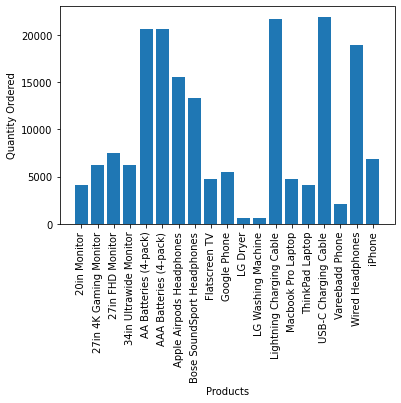

In [20]:
product_list = [product for product, df in merged_data.groupby('Product')]

plt.bar(product_list, most_sold_product)
plt.xticks(product_list, rotation='vertical')
plt.xlabel('Products')
plt.ylabel('Quantity Ordered')

plt.show()